In [1]:
!pip install yfinance -q

     |████████████████████████████████| 62 kB 830 kB/s 
     |████████████████████████████████| 6.4 MB 54.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd

import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras import models, layers

# Prepairing data

In [3]:
train = yf.download("BTC-USD", start="2014-01-01", end="2021-09-01")
test = yf.download("BTC-USD", start="2021-09-01", end="2022-06-27")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


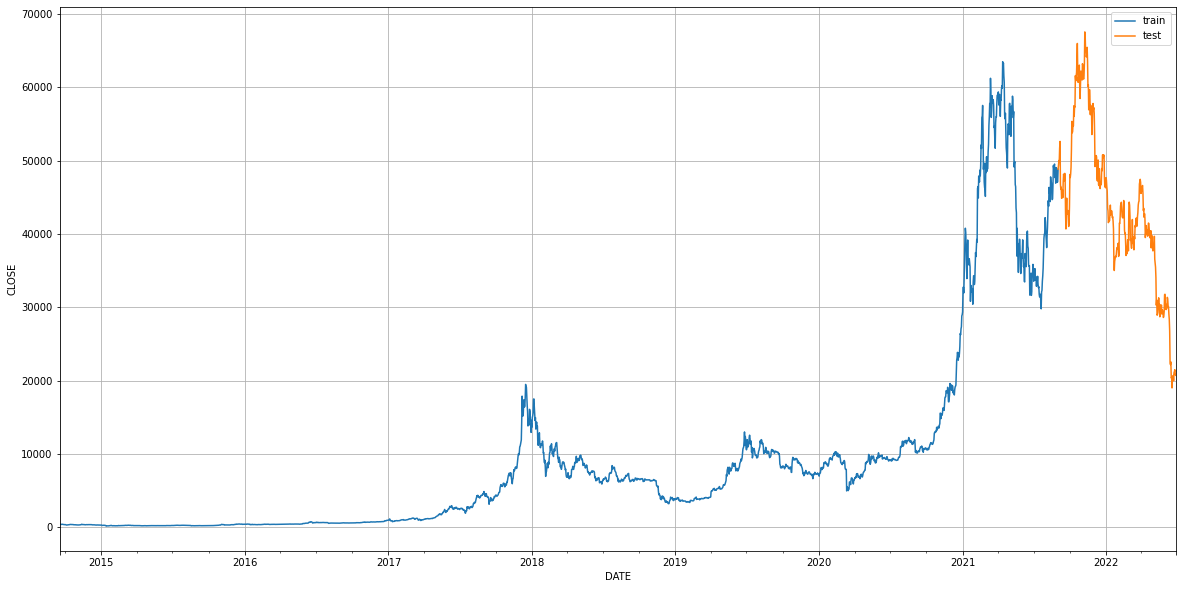

In [5]:

plt.figure(figsize=(20, 10))
train.Close.plot()
test.Close.plot()
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.legend(['train', 'test'])
plt.grid(True)
plt.show()



In [6]:
train.shape

(2542, 6)

In [7]:
test.shape

(300, 6)

In [8]:
train_prices = train.Close.values.reshape(-1, 1)
test_prices = test.Close.values.reshape(-1, 1)

In [9]:
print(f'train prices shape who closed at a day: {train_prices.shape}')
print(f'test prices shape who closed at a day: {test_prices.shape}')

train prices shape who closed at a day: (2542, 1)
test prices shape who closed at a day: (300, 1)


In [10]:
scaler = MinMaxScaler()
all_data = scaler.fit_transform(np.concatenate((train_prices,test_prices)))
train_prices = all_data[:len(train_prices)]
test_prices = all_data[len(train_prices):]
# train_prices = np.array(train_prices)
# test_prices = np.array(test_prices)

In [11]:
print(f'train prices shape who scaled between 0,1: {train_prices.shape} and min is {np.min(train_prices)} , max is {np.max(train_prices)}')
print(f'test prices shape who between 0,1: {test_prices.shape} and min is {np.min(test_prices)} , max is {np.max(test_prices)}')

train prices shape who scaled between 0,1: (2542, 1) and min is 0.0 , max is 0.9397025083050401
test prices shape who between 0,1: (300, 1) and min is 0.2795651579023923 , max is 1.0


In [12]:
train_prices[0,0]

0.004143586594572117

In [13]:
def prepair_data(data:np.array, count:int=60):
  x = []
  y = []
  for i in range(count, data.shape[0]):
    x.append(data[i-count:i,0])
    y.append(data[i,0])
  
  return np.array(x), np.array(y)



In [14]:
x_train, y_train = prepair_data(train_prices)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test, y_test = prepair_data(test_prices)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
x_train[0]

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       [0.00342492],
       [0.0032753 ],
       [0.00332473],
       [0.0038239 ],
       [0.00363714],
       [0.00346454],
       [0.00335845],
       [0.00328567],
       [0.00295417],
       [0.00292874],
       [0.00309905],
       [0.00304965],
       [0.00292288],
       [0.00269198],
       [0.00223721],
       [0.00211322],
       [0.00225521],
       [0.00234585],
       [0.00259445],
       [0.0027738 ],
       [0.0027224 ],
       [0.00273334],
       [0.00297447],
       [0.00315054],
       [0.0033057 ],
       [0.00321523],
       [0.00303393],
       [0.00305177],
       [0.0031658 ],
       [0.00313766],
       [0.00303822],
       [0.00309209],
       [0.00304287],
       [0.00267573],
       [0.00267466],
       [0.00251033],
       [0.00262063],
       [0.00259518],
       [0.00266387],
       [0.00233701],
       [0.00248116],
       [0.00237752],
       [0.00219096],
       [0.00219308],
       [0.002

In [16]:
print(f'train input data shape : {x_train.shape} and output data shape is {y_train.shape}')
print(f'test input data shape: {x_test.shape} and output data shape is {y_test.shape}')

train input data shape : (2482, 60, 1) and output data shape is (2482,)
test input data shape: (240, 60, 1) and output data shape is (240,)


# build model

In [24]:
def build_model(count=60):
    model = models.Sequential()
    model.add(layers.Input((count, 1)))
    model.add(layers.LSTM(units=50, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=50, return_sequences=False))
    model.add(layers.Dense(1))

    return model

model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [25]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
78/78 [==============================] - 63s 14ms/step - loss: 0.0042
Epoch 2/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 3/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 4/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 5/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 6/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 7/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 8/100
78/78 [==============================] - 1s 14ms/step - loss: 9.0645e-04
Epoch 9/100
78/78 [==============================] - 1s 14ms/step - loss: 7.2682e-04
Epoch 10/100
78/78 [==============================] - 1s 14ms/step - loss: 8.0731e-04
Epoch 11/100
78/78 [==============================] - 1s 13ms/step - loss: 7.2207e-04
Epoch 12/100
78/78 [==============================] - 1s 13ms/step - loss: 6.2513e-04
Epoc

In [35]:
x_test

array([[[0.72221168],
        [0.72934485],
        [0.73969751],
        ...,
        [0.8969458 ],
        [0.92077513],
        [0.91574264]],

       [[0.72934485],
        [0.73969751],
        [0.73849924],
        ...,
        [0.92077513],
        [0.91574264],
        [0.90728611]],

       [[0.73969751],
        [0.73849924],
        [0.7653403 ],
        ...,
        [0.91574264],
        [0.90728611],
        [0.9026184 ]],

       ...,

       [[0.56299266],
        [0.57966697],
        [0.58757196],
        ...,
        [0.29395016],
        [0.31025626],
        [0.31241952]],

       [[0.57966697],
        [0.58757196],
        [0.57029898],
        ...,
        [0.31025626],
        [0.31241952],
        [0.31643624]],

       [[0.58757196],
        [0.57029898],
        [0.55701858],
        ...,
        [0.31241952],
        [0.31643624],
        [0.30938695]]])

In [27]:
pred = model.predict(x_test)

In [71]:
pred.shape

(240, 1)

In [31]:
real_prediction_prices = scaler.inverse_transform(pred)
real_test_prices = scaler.inverse_transform(y_test.reshape(-1, 1)) 
print(f'the prediction price for first test us : {real_prediction_prices[0]} and the real price is {real_test_prices[0]}')

the prediction price for first test us : [59182.297] and the real price is [61318.95703125]


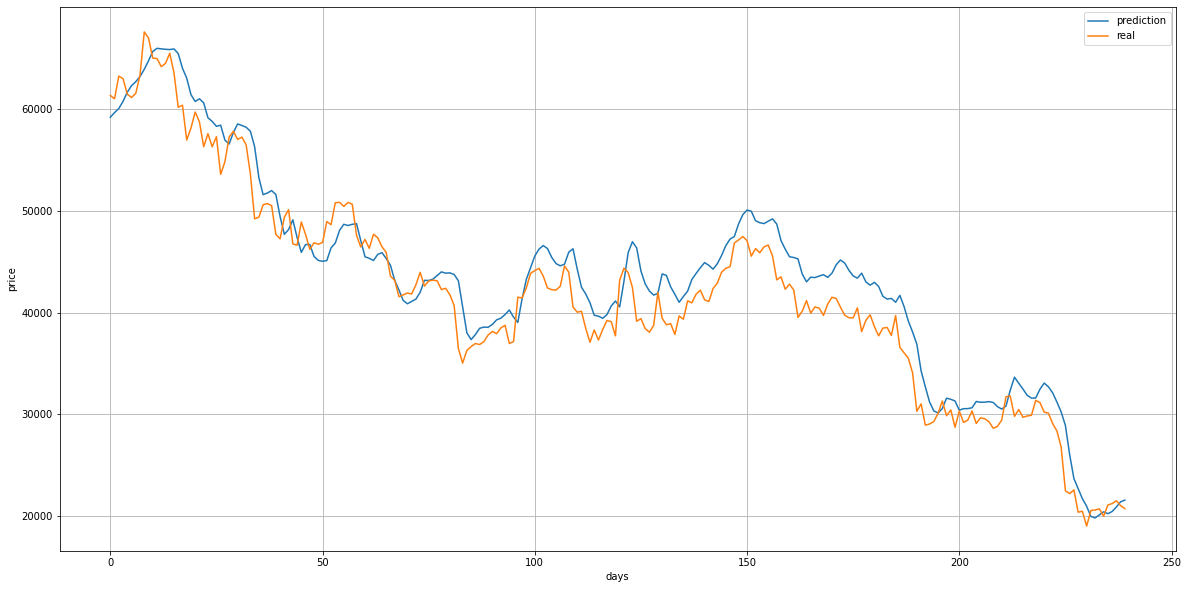

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(real_prediction_prices)
plt.plot(real_test_prices)
plt.legend(['prediction', 'real'])
plt.grid(True)
plt.xlabel('days')
plt.ylabel('price')
plt.show()


# For 90 days

In [130]:
y_test[0]

0.9072861063647294

In [115]:
data_90days = []
predicted_90days = []
current_data = y_test
for i in range(90):
  print(current_data.shape[0])
  day_before60 = current_data[current_data.shape[0]-60:]
  day_before60 = np.reshape(day_before60, (1,day_before60.shape[0], 1))
  data_90days.append(day_before60)
  y = model.predict(day_before60)
  current_data = np.append(current_data,y[0],axis=0)
  predicted_90days.append(y[0])


240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329


In [116]:

predicted_90days=np.array(predicted_90days)

In [117]:
real_price_90days =  scaler.inverse_transform(predicted_90days)

In [118]:
real_price_90days.shape

(90, 1)

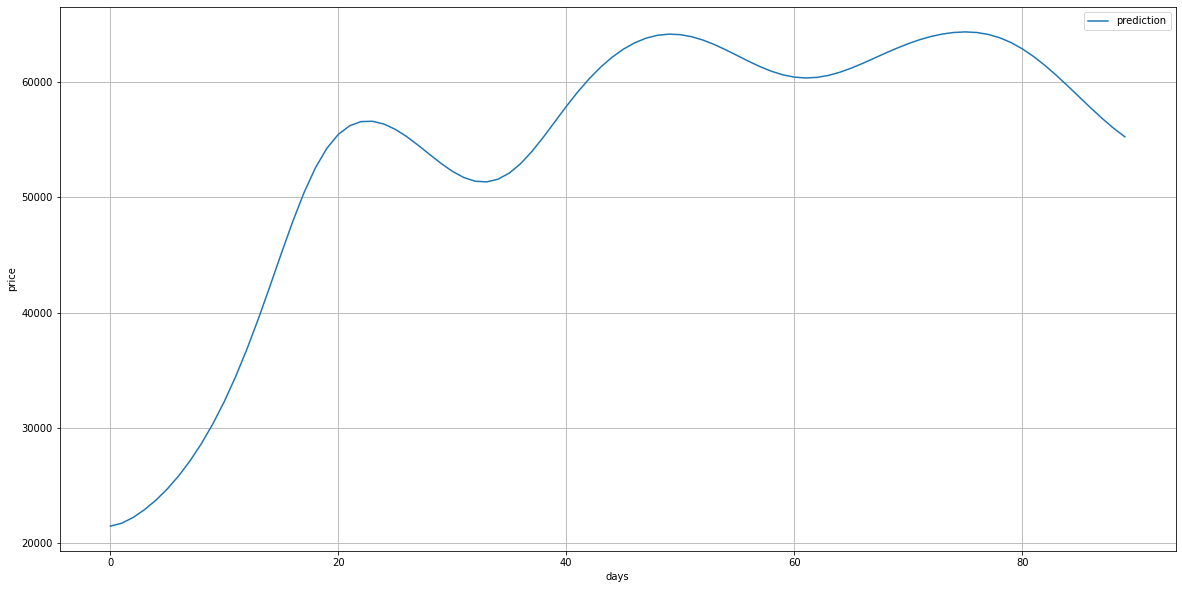

In [119]:
plt.figure(figsize=(20, 10))
plt.plot(real_price_90days)
plt.legend(['prediction'])
plt.grid(True)
plt.xlabel('days')
plt.ylabel('price')
plt.show()


In [120]:
x=y_test.reshape(-1, 1)
x.shape

(240, 1)

In [121]:
real_test_prices = scaler.inverse_transform(y_test.reshape(-1, 1)) 

In [124]:
current_data =  scaler.inverse_transform(current_data.reshape(-1, 1))

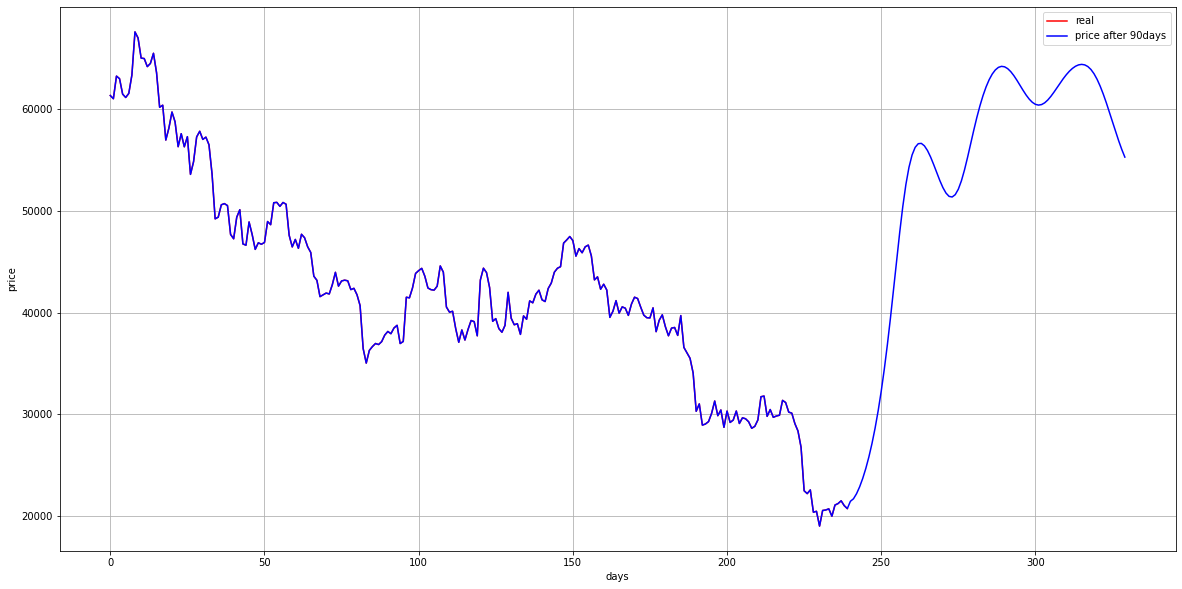

In [128]:
plt.figure(figsize=(20, 10))

plt.plot(real_test_prices,color='red')
plt.plot(current_data,color='blue')
plt.legend(['real','price after 90days'])
plt.grid(True)
plt.xlabel('days')
plt.ylabel('price')
plt.show()
